# Esercitazione 11
## Filtraggio e campionamento di immagini
#### Sommario
In questa esercitazione vengono analizzate e implementate diverse tecniche di filtraggio e campionamento su immagini digitali, con particolare riferimento all'immagine 	exttt{peppers.png}. L'esercitazione consente di comprendere l'impatto delle tecniche di pre-processing e delle operazioni di campionamento (down/up-sampling) sulla qualità dell'immagine.


In [1]:
import numpy as np
import matplotlib.pylab as plt 
import scipy.signal as ssi

#### Esercizio 1 -> Filtering and Denoising

(a) Leggere l'immagine 	exttt{peppers.png} (scaricabile dalla cartella del corso).

(b) Visualizzare l'immagine utilizzando il comando 	exttt{imshow} con l'opzione 	exttt{cmap='gray'} per visualizzarla in scala di grigi.

(c) Considerare il seguente filtro bidimensionale:

$$F_{LO} = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ \end{bmatrix}$$

Applicare il filtro $F_{LO}$ all'immagine utilizzando la convoluzione bidimensionale (utilizzare il comando 	exttt{convolve2d} della libreria 	exttt{scipy.signal}). Visualizzare l'immagine ottenuta.

(d) Creare una matrice $N$ della stessa dimensione dell'immagine 	exttt{peppers.png} contenente rumore gaussiano con media $\mu = 0$ e deviazione standard $\sigma = 0.05$ (utilizzare il comando 	exttt{np.random.normal}). Visualizzare l'immagine rumorosa $I_n = I + N$.

(e) Utilizzare il filtro definito al punto (c) per effettuare il denoising dell'immagine $I_n$. Visualizzare il risultato ottenuto.


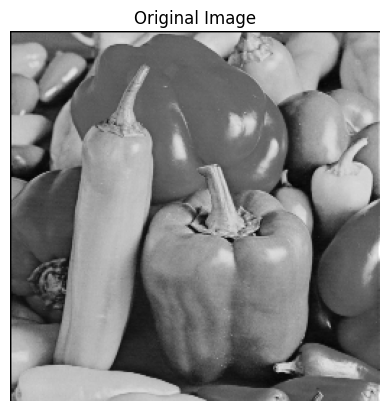

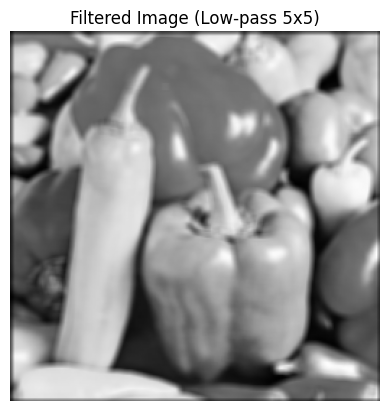

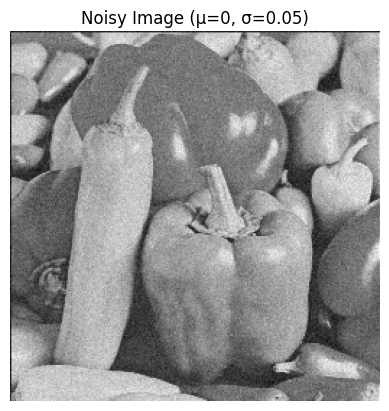

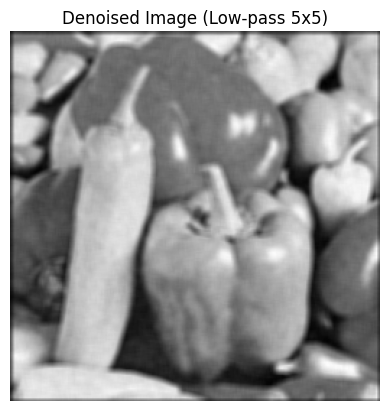

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ssi

# === Esercizio 1 - Filtering and Denoising ===

# --- (a) Lettura dell'immagine ---
X = np.array(plt.imread('peppers.png'), dtype='float64')

# --- (b) Visualizzazione dell'immagine originale ---
plt.imshow(X, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# --- (c) Creazione e applicazione del filtro F_LO ---
F_lo = (1.0 / 25.0) * np.ones((5, 5))  # Filtro media mobile 5x5
X_lo = ssi.convolve2d(X, F_lo, mode='same')

plt.imshow(X_lo, cmap='gray')
plt.title("Filtered Image (Low-pass 5x5)")
plt.axis('off')
plt.show()

# --- (d) Aggiunta di rumore gaussiano ---
mu, sigma = 0, 0.05
n = np.random.normal(mu, sigma, X.shape)  # Rumore gaussiano
X_n = X + n

plt.imshow(X_n, cmap='gray')
plt.title(f"Noisy Image (μ={mu}, σ={sigma})")
plt.axis('off')
plt.show()

# --- (e) Denoising usando il filtro F_LO ---
X_denoised = ssi.convolve2d(X_n, F_lo, mode='same')

plt.imshow(X_denoised, cmap='gray')
plt.title("Denoised Image (Low-pass 5x5)")
plt.axis('off')
plt.show()


#### Esercizio 2 -> Filtraggio e Campionamento

(a) Considerare il seguente filtro monodimensionale:

$$F_{HI-O} = \begin{bmatrix} 	frac{1}{2} \ 0 \ -	frac{1}{2} \end{bmatrix}$$

Applicare il filtro $F_{HI-O}$ all'immagine 	exttt{peppers.png} e visualizzare l'immagine ottenuta.

(b) Applicare il filtro $F_{HI-V} = F_{HI-O}^T$ all'immagine 	exttt{peppers.png} e visualizzare l'immagine ottenuta. Qual è la differenza rispetto a quanto ottenuto al punto precedente?

(c) Calcolare $$|
abla I| = \sqrt{I_x^2 + I_y^2}$$ dove $I_x$ e $I_y$ sono rispettivamente l'output del filtro al punto (a) e al punto (b). Visualizzare l'immagine ottenuta.

(d) Costruire una matrice $D_2$ che effettui un sottocampionamento di un fattore 2 ed applicarla all'immagine 	exttt{peppers.png} e all'immagine filtrata con filtro definito in 1.(c), ovvero calcolare $I_d = D_2 I D_2^T$. Visualizzare i risultati.

(e) Definire un'operazione di sovracampionamento che ad ogni pixel dell'immagine a bassa risoluzione fa corrispondere 4 pixel uguali nell'immagine ad alta risoluzione. Costruire una matrice che effettui l'operazione di sovracampionamento ed applicarla a $I_d$. Confrontare l'immagine ottenuta con quella originale.


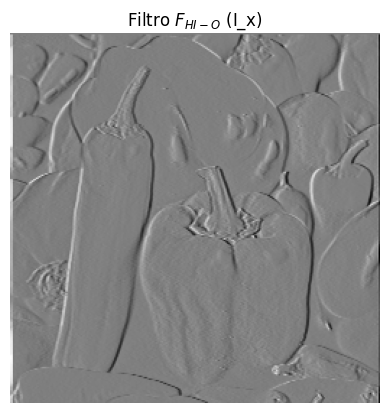

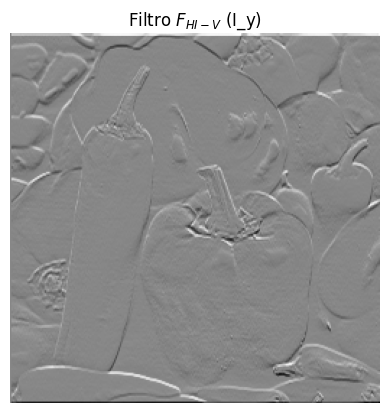

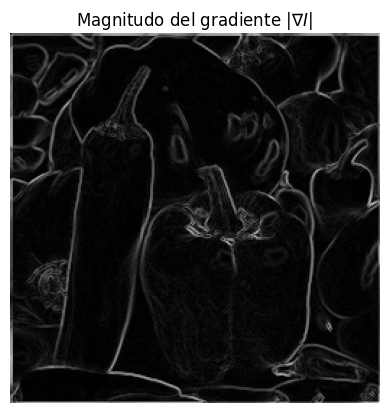

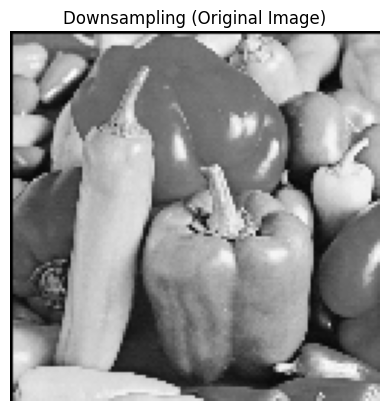

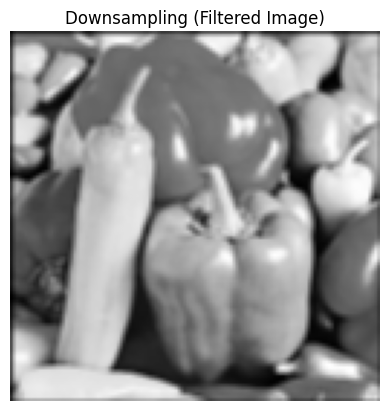

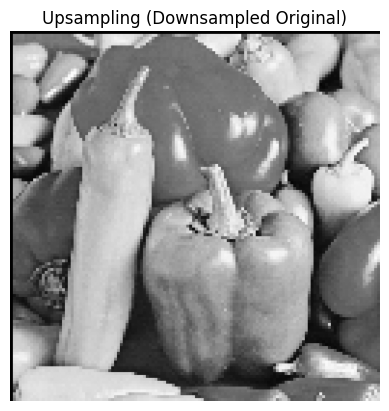

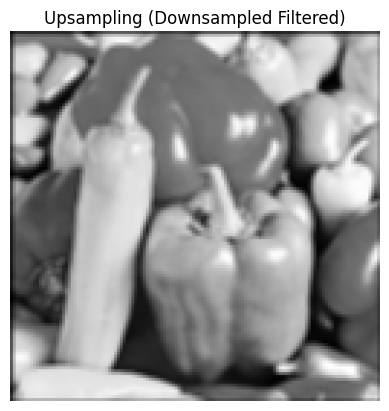

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ssi

# === Esercizio 2 - Filtraggio e Campionamento ===

# Assumo che X sia già caricato dall'esercizio 1 (immagine peppers.png)

# --- (a) Filtro monodimensionale orizzontale ---
F_hi1d_o = np.array([[+1.0/2.0, 0, -1.0/2.0]])  # Filtro orizzontale
I_x = ssi.convolve2d(X, F_hi1d_o, mode='same')

plt.imshow(I_x, cmap='gray')
plt.title(r"Filtro $F_{HI-O}$ (I_x)")
plt.axis('off')
plt.show()

# --- (b) Filtro monodimensionale verticale ---
F_hi1d_v = F_hi1d_o.T  # Trasposto del filtro orizzontale
I_y = ssi.convolve2d(X, F_hi1d_v, mode='same')

plt.imshow(I_y, cmap='gray')
plt.title(r"Filtro $F_{HI-V}$ (I_y)")
plt.axis('off')
plt.show()

# --- (c) Magnitudo del gradiente ---
grad_I = np.sqrt(I_x**2 + I_y**2)

plt.imshow(grad_I, cmap='gray')
plt.title(r"Magnitudo del gradiente $|\nabla I|$")
plt.axis('off')
plt.show()

# --- (d) Sottocampionamento di fattore 2 ---
def downsample_matrix(N):
    """Crea matrice di downsampling di fattore 2 per immagini NxN."""
    D = np.zeros((N // 2, N))
    for ii in range(N // 2):
        D[ii, ii * 2] = 1
    return D

# Downsampling immagine originale
D = downsample_matrix(X.shape[0])
I_down = D @ X @ D.T

plt.imshow(I_down, cmap='gray')
plt.title("Downsampling (Original Image)")
plt.axis('off')
plt.show()

# Downsampling immagine filtrata (dall'es.1.c)
D_lo = downsample_matrix(X_lo.shape[0])
I_down_lo = D_lo @ X_lo @ D_lo.T

plt.imshow(I_down_lo, cmap='gray')
plt.title("Downsampling (Filtered Image)")
plt.axis('off')
plt.show()

# --- (e) Upsampling (replicazione pixel) ---
def upsample_matrix(N):
    """Crea matrice di upsampling che replica i pixel."""
    U = np.zeros((N, N // 2))
    for ii in range(N // 2):
        U[2 * ii, ii] = 1
        U[2 * ii + 1, ii] = 1
    return U

U = upsample_matrix(X.shape[0])

# Upsampling immagine downsampled originale
I_up = U @ I_down @ U.T
plt.imshow(I_up, cmap='gray')
plt.title("Upsampling (Downsampled Original)")
plt.axis('off')
plt.show()

# Upsampling immagine downsampled filtrata
I_up_lo = U @ I_down_lo @ U.T
plt.imshow(I_up_lo, cmap='gray')
plt.title("Upsampling (Downsampled Filtered)")
plt.axis('off')
plt.show()
